In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import data_create
import IRM_3D_gibs_sampling

### create toy data

In [3]:
# data_num_per_cluster (X,Y,Z)
x_dim = 4
y_dim = 4
z_dim = 4

# set cluster_num for toy data
x_cluster_num = 4
y_cluster_num = 4
z_cluster_num = 4

# determine theta parameter as parameters of bernoulli distributions.
# ideal pattern
theta = np.zeros((x_cluster_num, y_cluster_num, z_cluster_num))
p = 9
np.put(theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p, replace=False),1)

# noisy pattern(close to real data)
noisy_theta = np.zeros((x_cluster_num, y_cluster_num, z_cluster_num))
p1 = 25
p0 = 25
np.put(noisy_theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p1, replace=False),0.8)
np.put(noisy_theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p0, replace=False),0.2)

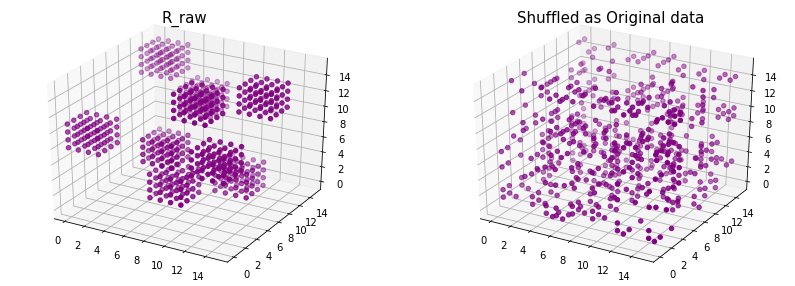

In [4]:
R =data_create.make_toy_data(x_dim=x_dim, y_dim=y_dim, z_dim=z_dim, theta=theta, plot_option=True)

In [5]:
R.shape

(16, 16, 16)

### gibbs sampling

In [6]:
# parameter of Dirichlet Process
alpha=2.0

# parameter of beta distribution
a=1.0
b=1.0

In [7]:
# inference
np.random.seed(0)
max_sx, max_sy, max_sz, max_theta = IRM_3D_gibs_sampling.predict_S(R=R, alpha=alpha, a=a, b=b, iter_num=500, reset_iter_num=10)

 calculating... t=0  update S and theta : logP(sx, sy, sz, theta| R) =  -532.0831068687161
 calculating... t=1  update S and theta : logP(sx, sy, sz, theta| R) =  -133.23190640066406
 calculating... t=102  update S and theta : logP(sx, sy, sz, theta| R) =  -133.23190640066403
 calculating... t=499

In [8]:
predict_R = R[max_sx.argsort(),:,:][:, max_sy.argsort(),:][:, :, max_sz.argsort()]
sorted_sx = np.sort(max_sx)
sorted_sy = np.sort(max_sy)
sorted_sz = np.sort(max_sz)

### visualization

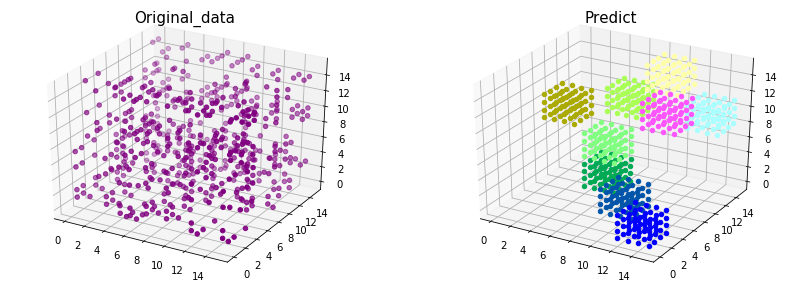

In [9]:
fig = plt.figure(figsize=(14,5))

ax0 = fig.add_subplot(121, projection='3d')    
for i in range(R.shape[0]):
    R_per_x = R[i,:,:]
    x1=np.arange(R_per_x.shape[0])
    x2=np.arange(R_per_x.shape[1])
    
    X1, X2 = np.meshgrid(x1, x2)
    X1_on = np.ravel(X1)[np.ravel(R_per_x)==1]
    X2_on = np.ravel(X2)[np.ravel(R_per_x)==1]
    ax0.scatter3D(np.ravel(X1_on), np.ravel(X2_on), i, marker="o",linestyle='None', color='purple')

ax1 = fig.add_subplot(122, projection='3d')
for x in range(predict_R.shape[0]):
    
    predict_R_per_x = predict_R[x,:,:]
    if np.sum(predict_R_per_x)==0:
        continue
    x1=np.arange(predict_R_per_x.shape[1])
    x2=np.arange(predict_R_per_x.shape[0])
    
    X1, X2 = np.meshgrid(x1, x2)
    X1_on = np.ravel(X1)[np.ravel(predict_R_per_x)==1]
    X2_on = np.ravel(X2)[np.ravel(predict_R_per_x)==1]

    Sz, Sy = np.meshgrid(sorted_sz, sorted_sy)
    Sz_on = np.ravel(Sz)[np.ravel(predict_R_per_x)==1]
    Sy_on = np.ravel(Sy)[np.ravel(predict_R_per_x)==1]
    
    sx_per = sorted_sx[x]
    color_list = [[sx_per,y,z] for z,y in zip(Sz_on, Sy_on)]
    color_list/=np.max(color_list)
    
    for indexs, (X1_on_per, X2_on_per) in enumerate(zip(X1_on, X2_on)):

        ax1.scatter3D(X1_on_per, X2_on_per, x, marker="o",linestyle='None', color=color_list[indexs])
    
ax0.set_title("Original_data", fontsize=15)
ax1.set_title("Predict", fontsize=15);

In [10]:
print(max_theta.shape)

(4, 4, 4)


### noisy data

#### create toy data

In [12]:
# noisy pattern(close to real data)
noisy_theta = np.zeros((x_cluster_num, y_cluster_num, z_cluster_num))
p1 = 25
p0 = 25
np.put(noisy_theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p1, replace=False),0.8)
np.put(noisy_theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p0, replace=False),0.2)

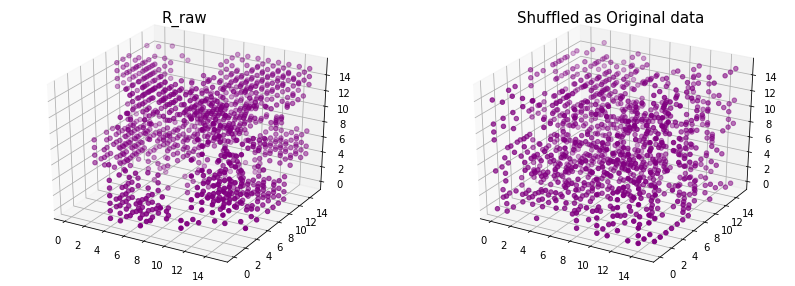

In [13]:
R_noisy =data_create.make_toy_data(x_dim=x_dim, y_dim=y_dim, z_dim=z_dim, theta=noisy_theta, plot_option=True)

#### gibbs sampling

In [14]:
# inference
np.random.seed(0)
max_sx_noisy, max_sy_noisy, max_sz_noisy, max_theta_noisy = IRM_3D_gibs_sampling.predict_S(R=R_noisy, alpha=alpha, a=a, b=b, iter_num=500, reset_iter_num=10)

 calculating... t=0  update S and theta : logP(sx, sy, sz, theta| R) =  -1516.4815689074396
 calculating... t=2  update S and theta : logP(sx, sy, sz, theta| R) =  -1351.4088098797065
 calculating... t=33  update S and theta : logP(sx, sy, sz, theta| R) =  -1347.696851746412
 calculating... t=282  update S and theta : logP(sx, sy, sz, theta| R) =  -1347.5728688501301
 calculating... t=499

In [15]:
predict_R_noisy = R_noisy[max_sx_noisy.argsort(),:,:][:, max_sy_noisy.argsort(),:][:, :, max_sz_noisy.argsort()]
sorted_sx_noisy = np.sort(max_sx_noisy)
sorted_sy_noisy = np.sort(max_sy_noisy)
sorted_sz_noisy = np.sort(max_sz_noisy)

#### visualization

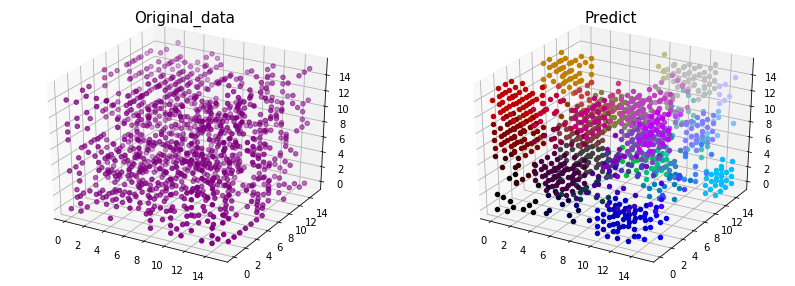

In [16]:
fig = plt.figure(figsize=(14,5))

ax0 = fig.add_subplot(121, projection='3d')    
for i in range(R_noisy.shape[0]):
    R_per_x = R_noisy[i,:,:]
    x1=np.arange(R_per_x.shape[0])
    x2=np.arange(R_per_x.shape[1])
    
    X1, X2 = np.meshgrid(x1, x2)
    X1_on = np.ravel(X1)[np.ravel(R_per_x)==1]
    X2_on = np.ravel(X2)[np.ravel(R_per_x)==1]
    ax0.scatter3D(np.ravel(X1_on), np.ravel(X2_on), i, marker="o",linestyle='None', color='purple')

ax1 = fig.add_subplot(122, projection='3d')
for x in range(predict_R_noisy.shape[0]):
    
    predict_R_per_x = predict_R_noisy[x,:,:]
    if np.sum(predict_R_per_x)==0:
        continue
    x1=np.arange(predict_R_per_x.shape[1])
    x2=np.arange(predict_R_per_x.shape[0])
    
    X1, X2 = np.meshgrid(x1, x2)
    X1_on = np.ravel(X1)[np.ravel(predict_R_per_x)==1]
    X2_on = np.ravel(X2)[np.ravel(predict_R_per_x)==1]

    Sz, Sy = np.meshgrid(sorted_sz_noisy, sorted_sy_noisy)
    Sz_on = np.ravel(Sz)[np.ravel(predict_R_per_x)==1]
    Sy_on = np.ravel(Sy)[np.ravel(predict_R_per_x)==1]
    
    sx_per = sorted_sx_noisy[x]
    color_list = [[sx_per,y,z] for z,y in zip(Sz_on, Sy_on)]
    color_list/=np.max(color_list)
    
    for indexs, (X1_on_per, X2_on_per) in enumerate(zip(X1_on, X2_on)):

        ax1.scatter3D(X1_on_per, X2_on_per, x, marker="o",linestyle='None', color=color_list[indexs])
    
ax0.set_title("Original_data", fontsize=15)
ax1.set_title("Predict", fontsize=15);

In [17]:
print(max_theta.shape)

(4, 4, 4)


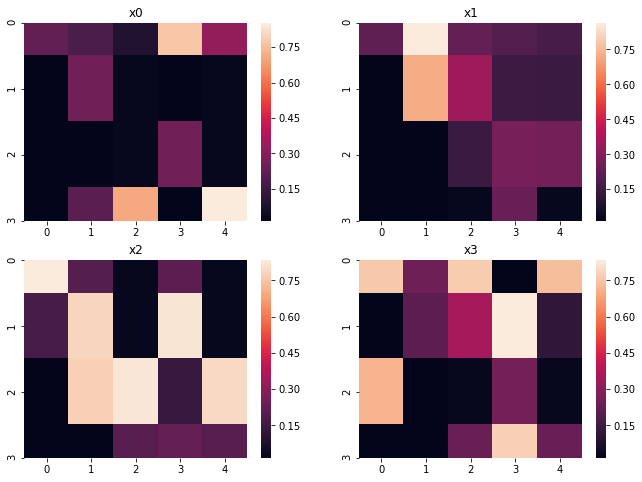

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,8))
for i, matrix in enumerate(max_theta_noisy):
    sns.heatmap(matrix, ax=ax[int(i/2), i%2])
    ax[int(i/2), i%2].set_title('x{}'.format(i))